In [13]:
import cv2
import mediapipe as mp
import numpy as np
import uuid
import os
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import joblib

In [14]:
# Carregar os dados
data = pd.read_csv('Exerc4.csv', sep = ',')
#data = data[data['gesture'] != 0]

In [15]:
data.head()

,landmark_0_x,landmark_1_x,landmark_2_x,landmark_3_x,landmark_4_x,landmark_5_x,landmark_6_x,landmark_7_x,landmark_8_x,landmark_9_x,...,landmark_12_z,landmark_13_z,landmark_14_z,landmark_15_z,landmark_16_z,landmark_17_z,landmark_18_z,landmark_19_z,landmark_20_z,gesture
0,0.454800,0.727359,7.536099e-07,0.282040,0.670825,-0.008719,0.221034,0.591010,-0.012131,0.238629,...,0.587238,0.485426,-0.025769,0.579388,0.437495,-0.019327,0.574989,0.397765,-0.011311,0
1,0.459636,0.734663,7.001772e-07,0.287442,0.674049,-0.004342,0.224699,0.592468,-0.009672,0.238134,...,0.588738,0.481306,-0.031239,0.580652,0.433497,-0.020445,0.574371,0.393703,-0.010082,0
2,0.460332,0.739155,6.984162e-07,0.289192,0.677088,-0.004709,0.224883,0.594247,-0.008767,0.238149,...,0.589250,0.482087,-0.023648,0.580210,0.434184,-0.013707,0.571469,0.394595,-0.004358,0
3,0.462164,0.739850,6.618680e-07,0.289780,0.677875,-0.001432,0.224841,0.594474,-0.002688,0.238220,...,0.591921,0.482144,-0.012802,0.583750,0.435184,-0.000687,0.575860,0.396995,0.009937,0
4,0.462442,0.740926,6.648747e-07,0.290021,0.678892,-0.001036,0.226012,0.595574,-0.002263,0.239271,...,0.593043,0.482577,-0.012070,0.583855,0.435276,0.000918,0.574820,0.396998,0.012436,0


In [16]:
X = data.drop(columns=['gesture'])
y = data['gesture']

In [17]:
#Converter rótulo
label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)  #"Mão aberta" -> 0, "Mão fechada" -> 1

In [18]:
#divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
#treino do modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
#Avaliação
y_pred = model.predict(X_test)
print("Precisao:", accuracy_score(y_test, y_pred))

Precisao: 0.9558823529411765


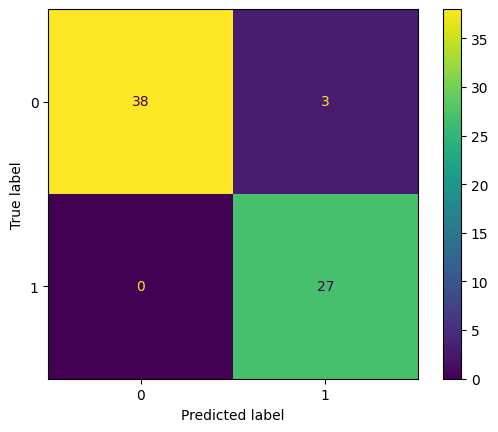

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [22]:
#Salvar modelo
joblib.dump(model, 'Modelo_Exercicio4.pkl')

['Modelo_Exercicio4.pkl']